In [13]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.17.2
0.25.1


## Pandas.DataFrame

Each subsequent exercise ramps up in difficulty. Sample answers are in a separate folder with an explanation (there might be multiple ways to solve a problem though!) 

- Use Pandas "read_csv()" function to import the gradebook_v2 file.

In [14]:
gradebook = pd.read_csv('gradebook_v2.csv')
gradebook

,student,midterm,final,letter_grade
0,Ben,88.0,85.0,B
1,May,78.0,82.0,C
2,Sue,92.0,51.0,C
3,Blake,56.0,85.0,C
4,Amy,79.0,NaN,C
5,Steve,NaN,79.0,C


- As discussed, DataFrames are made up of Series.  Let's prove it.  Extract any one Series from your DataFrame into a new variable.  Then, run the "type()" function on both your extracted Series and the entire DataFrame.

In [15]:
students = gradebook['student']
print(type(gradebook))
print(type(students))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


- Set the Index of your DataFrame to be equal to the values of the "student" variable, and then drop the variable from the dataset.  Note, you can do this as separate steps, or using the "set_index()" function as described in 11.09.

In [23]:
gradebook = gradebook.set_index('student')

In [26]:
gradebook

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C
Steve,NaN,79.0,C


Excellent!  Now let's practice subsetting.  Complete the following:
+ Subset the DataFrame to only include Ben and Blake.
+ Subset the DataFrame to only include students who scored under an 85 on the midterm.
+ Subset the DataFrame to only include students who scored a B.

Bonus:
+ Subset the DataFrame to students who are missing a final score (hint - look up the "isnull()" function).
+ Update your subset function to to use the "~" special character.  That is, instead of [x < 4], try [~x < 4].  What does this do?
+ Use the "~" character to subset the DataFrame to students who are NOT missing a final score.


In [30]:
gradebook.loc[['Ben', 'Blake']]

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B
Blake,56.0,85.0,C


In [40]:
gradebook[gradebook['midterm'] < 85]

,midterm,final,letter_grade
student,,,
May,78.0,82.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C


In [41]:
gradebook[gradebook['letter_grade'] == 'B']

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B


In [42]:
gradebook[gradebook['letter_grade'] == 'C']

,midterm,final,letter_grade
student,,,
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C
Steve,NaN,79.0,C


In [43]:
gradebook[gradebook['final'].isnull()]

,midterm,final,letter_grade
student,,,
Amy,79.0,NaN,C


In [44]:
gradebook[~gradebook['final'].isnull()]

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Steve,NaN,79.0,C


In [45]:
gradebook[~gradebook['midterm'].isnull()]

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C


- Create a scatterplot of midterm vs. final grades.  Title it "Midterm and Final Grades."  What happens to points with missing values?

Text(0.5, 1.0, 'Midterm and Final')

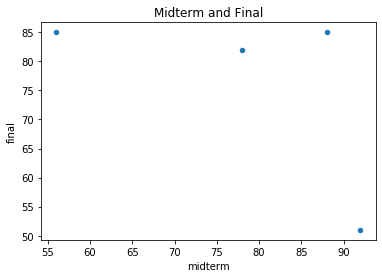

In [46]:
gradebook.plot.scatter(x = 'midterm', y = 'final')
plt.title("Midterm and Final")

- Manually create a new gradebook DataFrame with 5 more students (hint: use the dictionary method of creating a dataframe).  Then, look up how to use the "DataFrame.append" function to combine this new gradebook with the one used above.  Finally, plot your updated gradebook.

In [47]:
type(gradebook)

pandas.core.frame.DataFrame

In [48]:
new_grades = pd.DataFrame({'midterm':pd.Series([88,12,40,98,92]), 
                           'final':pd.Series([90,25,80,94,88]),
                           'letter_grade':pd.Series(['B','F','C','A','B'])})

In [63]:
new_grades.index = pd.Series(['Samuel','Jonathan','Raul','Jason','Regan'])

In [52]:
test_grades = pd.DataFrame({'midterm':pd.Series([78,82,86,92,97])})

In [64]:
new_grades

,midterm,final,letter_grade
Samuel,88,90,B
Jonathan,12,25,F
Raul,40,80,C
Jason,98,94,A
Regan,92,88,B


In [53]:
test_grades

,midterm
0,78
1,82
2,86
3,92
4,97


In [55]:
gradebook

,midterm,final,letter_grade
student,,,
Ben,88.0,85.0,B
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C
Steve,NaN,79.0,C


In [70]:
new_gradebook = gradebook.copy()

In [71]:
new_gradebook = new_gradebook.append(new_grades)

In [72]:
new_gradebook

,midterm,final,letter_grade
Ben,88.0,85.0,B
May,78.0,82.0,C
Sue,92.0,51.0,C
Blake,56.0,85.0,C
Amy,79.0,NaN,C
Steve,NaN,79.0,C
Samuel,88.0,90.0,B
Jonathan,12.0,25.0,F
Raul,40.0,80.0,C
Jason,98.0,94.0,A


Text(0.5, 1.0, 'Midterm and Final')

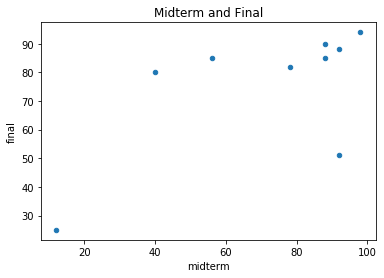

In [75]:
new_gradebook.plot.scatter(x = 'midterm', y = 'final')
plt.title("Midterm and Final")

- Set the name property of your DataFrame to 'student'.  Then, save your new csv as "gradebook_v3.csv"

In [76]:
new_gradebook.index.name = 'student'
new_gradebook.to_csv('gradebook_v3.csv')